# Deep Learning for Side-Channel Analysis

_Adrien Chuttarsing & Luca Veyrin-Forrer & Malik Kazi Aoual & Martin Bauw & Nouredine Nour_

> ## 1. Challenge introduction

> ## 2. Business case

>> ### 2.1  Embedded encryption, data and IoT
>> ### 2.2 Challenge metric and Key Performance Indicator

> ## 3. Exploratory data analysis

> ## 4. Baseline solution

> ## 5. Making a RAMP submission

# 1. Challenge introduction

This challenge is about revealing the relevance of deep learning in the field of a certain type of cyber attack: the Side-Channel Attack (SCA). SCA harvests Side-Channel Analysis information in order to breach a protected system. This information consists in physical measurements associated with the hardware on which the cryptographic algorithms are implemented. Here, we consider the use of electromagnetic measurements of the activity of a smart card as a side-channel to attack an AES encryption implementation. The project was inspired by the work of an ANSSI and CEA team https://github.com/ANSSI-FR/ASCAD formalized in a research article https://eprint.iacr.org/2018/053.pdf 

The overall advent of AI doesn't go without impacting cybersecurity, a growing and essential field for any economy in our digitalized world. Ernst and Young reports an expected **global cost of 6 trillions US dollars for cybersecurity breaches across all sectors by 2021**.

# 2. Business case

## 2.1  Embedded encryption, data and IoT

This challenge focuses on the ability of **deep learning to help in the cracking of encryption in small hardware that would typically be embedded in IoT devices**. IoT devices are central among the cybersecurity concerns, since the upcoming IoT revolution translates into a massive introduction of connected devices among networks, which is directly associated with a wealth of personal and sensitive data. 

![Connected devices growth curve](images/connecteddevices.png)
**Image credit:** The Economist

Connected devices have a history of being targeted by cyber attacks since many of them aren't well protected when one consider the interest of the data if gives access to. According to the EU 2017 cybersecurity facts sheet, **there will be tens of billions of connected digital devices in the EU alone by 2020**. The following illustration reveals estimations of how valuable data records can be, depending on the industry they are associated with.

Furthermore, working on AES (Advanced Encryption Standard) gives substantial legitimacy to machine learning as a prominent player in cybersecurity, since it is a US federal government standard. AES is a symmetric key algorithm, a unique key is shared by both encryption and decryption processes. Depending on key length, AES is even said to be used to secure US classified information (192 or 256 bits keys). Here, the AES implementation being attacked relies on 16-byte/128 bits keys. The technique used to find the secret key actually recovers the latter byte by byte, see the paper cited in the introduction for additional details. Finally, **AES was initially selected for its speed and low RAM requirements, making it well suited for both powerful computers and 8-bit smart cards**. This only reinforces the relevance of this challenge regarding the future of cybersecurity and IoT in particular.

## 2.2 Challenge metric and Key Performance Indicator

Your machine learning will use electromagnetic traces as data. It consists in 700 features, for as many

Area under rank curve: how much did we spend
KPI: correlated to anything protected by AES code

Defining a **key performance indicator** regarding this project basically means fixing the value of what the encryption is protecting. The thing is, we are targeting here a typical embedded security mean, that could be linked to sensible data in any industry. In order to still find a way of defining **an order of magnitude of the amount of money behind our challenge's scores**, let's assume our AES encryption will systematically protect one record for one type of industry. The table below, "Cost per record lost (...)", indicates exactly **how much money the cracking of the secret key is actually worth**: it ranges from an unclear "public" record at **86 US dollars**, to a "health" personal record, at **402 US dollars**. To realize the relevance of this deep learning application, **multiply those sums of money with the number of IoT devices expected in the years to come** (previous illustration).

In [4]:
## Source https://www.calyptix.com/wp-content/uploads/healthcare-data-breach-cost-per-record.jpg
from IPython.display import Image
source = 'https://www.calyptix.com/wp-content/uploads/healthcare-data-breach-cost-per-record.jpg'
Image(url = source, width=700, height=200)

# 3. Exploratory data analysis
## Description of the data

We will use for this challenge an open database, named ASCAD, containing useful data for our side-channel experimentations. As precised previously, the dataset we will use consists of electromagnetic traces. These traces are composed of 700 features.


- each row in the dataframe is a trace
- each trace is composed of electromagnetic measurements zoomed in on the 700 samples window of interest containing the relevant information (feature 0 to 700)

The main difficulty in this dataset is to interprete the features which are not easily understandable at the first approach.

### Requirements


In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Data loading

Here is the simplest way to load the data. The h5 file has to be in the data folder.

In [2]:
in_file = h5py.File('data/ASCAD.h5','r')
# Load profiling traces
X_train = np.array(in_file['Profiling_traces/traces'], dtype=np.int8)
# Load profiling labels
y_train = np.array(in_file['Profiling_traces/labels'])
# Load attacking traces
X_test = np.array(in_file['Attack_traces/traces'], dtype=np.int8)
# Load attacking labels
y_test = np.array(in_file['Attack_traces/labels'])

df_train = pd.DataFrame(X_train)
df_test  = pd.DataFrame(y_train)

### A first glympse

In [4]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,19.988140,19.215220,14.979940,8.371440,0.590740,-7.690040,-16.481780,-25.824800,-35.337040,-43.645820,...,-50.366580,-45.824400,-41.853060,-37.731280,-31.992800,-23.645800,-13.219660,-2.214860,7.235560,13.70676
std,2.756678,2.856043,3.127589,3.253264,3.150778,3.083873,3.083877,3.130045,2.970593,2.475944,...,1.688128,1.560966,1.428786,1.641634,2.285531,3.008622,3.475504,3.363897,2.729106,1.87719
min,10.000000,9.000000,3.000000,-3.000000,-10.000000,-17.000000,-26.000000,-35.000000,-44.000000,-52.000000,...,-56.000000,-51.000000,-47.000000,-43.000000,-38.000000,-32.000000,-22.000000,-13.000000,-1.000000,7.00000
25%,18.000000,17.000000,13.000000,6.000000,-2.000000,-10.000000,-19.000000,-28.000000,-38.000000,-46.000000,...,-52.000000,-47.000000,-43.000000,-39.000000,-34.000000,-26.000000,-16.000000,-5.000000,5.000000,12.00000
50%,20.000000,19.000000,15.000000,8.000000,0.000000,-8.000000,-16.000000,-26.000000,-35.000000,-44.000000,...,-50.000000,-46.000000,-42.000000,-38.000000,-32.000000,-24.000000,-13.000000,-2.000000,7.000000,14.00000
75%,22.000000,21.000000,17.000000,11.000000,3.000000,-5.000000,-14.000000,-23.000000,-33.000000,-42.000000,...,-49.000000,-45.000000,-41.000000,-37.000000,-30.000000,-21.000000,-10.000000,0.000000,9.000000,15.00000
max,30.000000,29.000000,26.000000,20.000000,12.000000,3.000000,-7.000000,-16.000000,-27.000000,-36.000000,...,-45.000000,-41.000000,-37.000000,-32.000000,-25.000000,-15.000000,-3.000000,7.000000,15.000000,20.00000


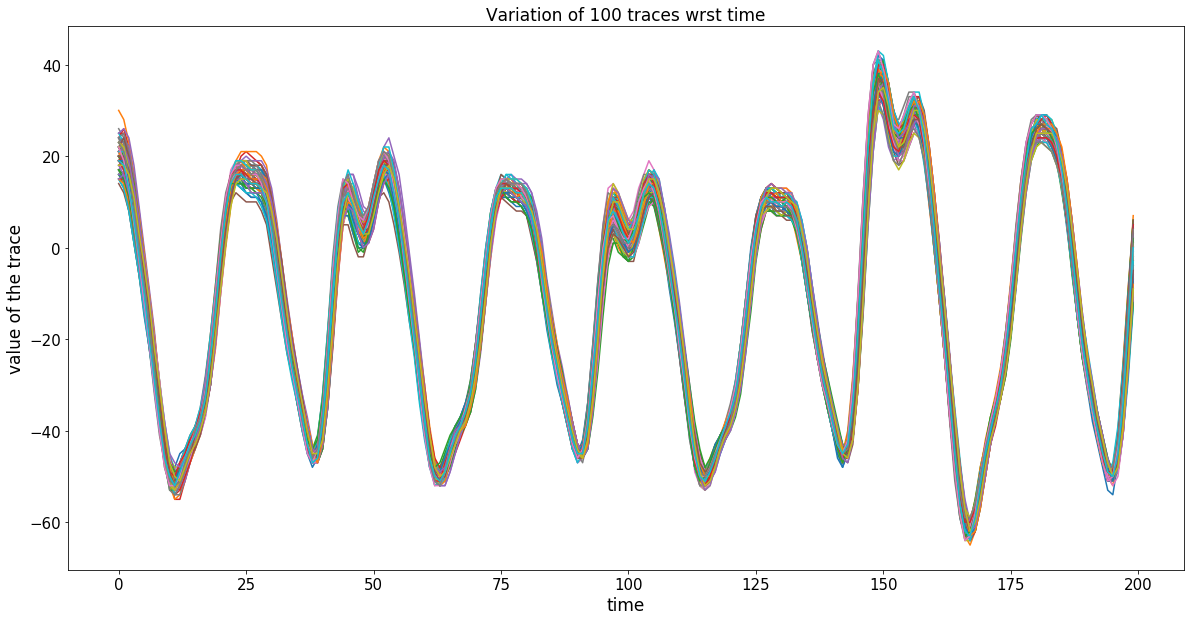

In [18]:
plt.figure(figsize=(20,10))
for i in [x*2 for x in range(100)]:
    plt.plot(df_train.values[i,:200])
plt.title("Variation of 100 traces wrst time",fontsize=17)
plt.xlabel("time",fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel("value of the trace",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

We have here the variation of ten electromagnetic traces over time. It looks like every trace has mainly the same behaviour. Indeed we could explain this by the fact that these traces are information leaked from the physical implementations of cryptographic algorithms which are, at this scale, analogous.

### The labels

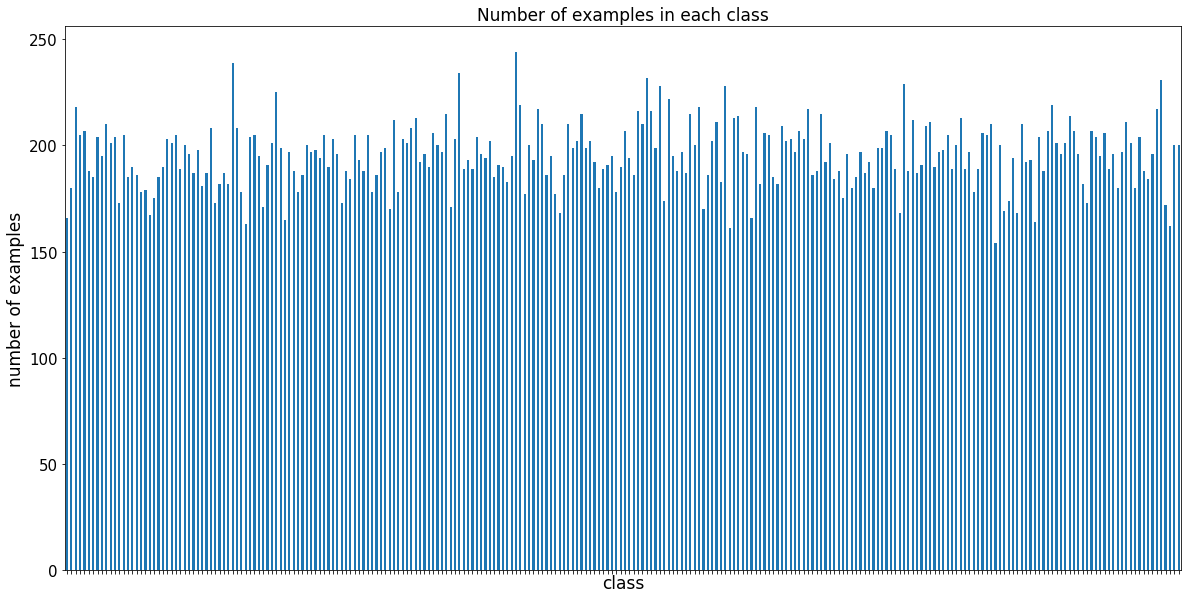

In [32]:
pd.DataFrame(np.unique(y_train, return_counts=True)[1]).plot(kind='bar', figsize=(20,10), legend=False)
plt.title("Number of examples in each class",fontsize=17)
plt.xlabel("class",fontsize=17)
plt.xticks(fontsize=15, visible=False)
plt.ylabel("number of examples",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

We see that we have 256 different labels. Furthermore, the dataset is quite balanced.

### The features

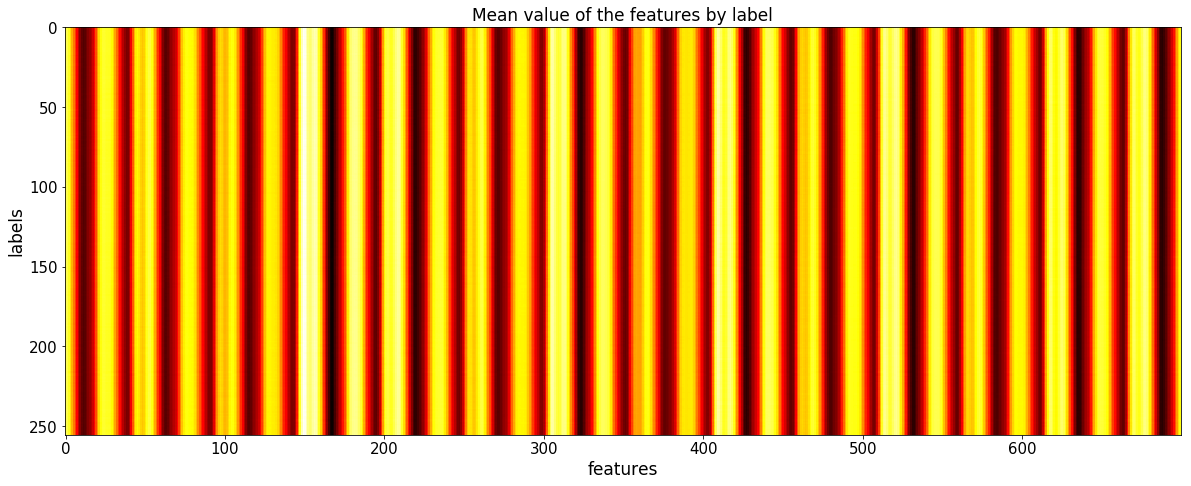

In [8]:
df_train_labelled = df_train.copy()
df_train_labelled[700] = y_train
u = df_train_labelled.groupby([700]).mean()

plt.figure(figsize=(20,10))

plt.imshow(u, cmap='hot', interpolation='nearest')
plt.title("Mean value of the features by label",fontsize=17)
plt.xlabel("features",fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel("labels",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

In this figure, we computed for each label, the mean of the value of each feature. We can notice here that the features have globally the same mean irrespective of the label.

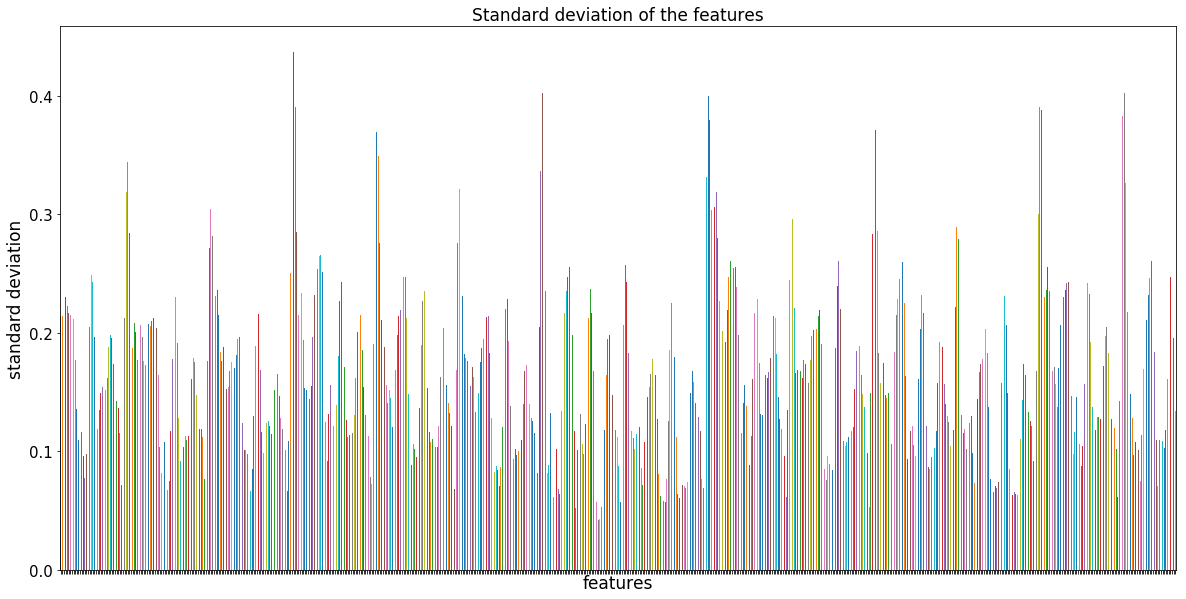

In [33]:
plt.figure(figsize=(20,10))
u.std().plot( kind='bar')
plt.title("Standard deviation of the features",fontsize=17)
plt.xlabel("features",fontsize=17)
plt.xticks(fontsize=15, visible=False)
plt.ylabel("standard deviation",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

From this point of view and in light of these experiences, it seems the different features have globally the same behaviour except some which have clearly a higher standard deviation. Maybe it could be smart to focus on these features for the model or if we would like to do a feature selection.

### Let's look at it more in details

Here is a function that automaticaly find extrema in the traces. After normalization, let us zoom on these :

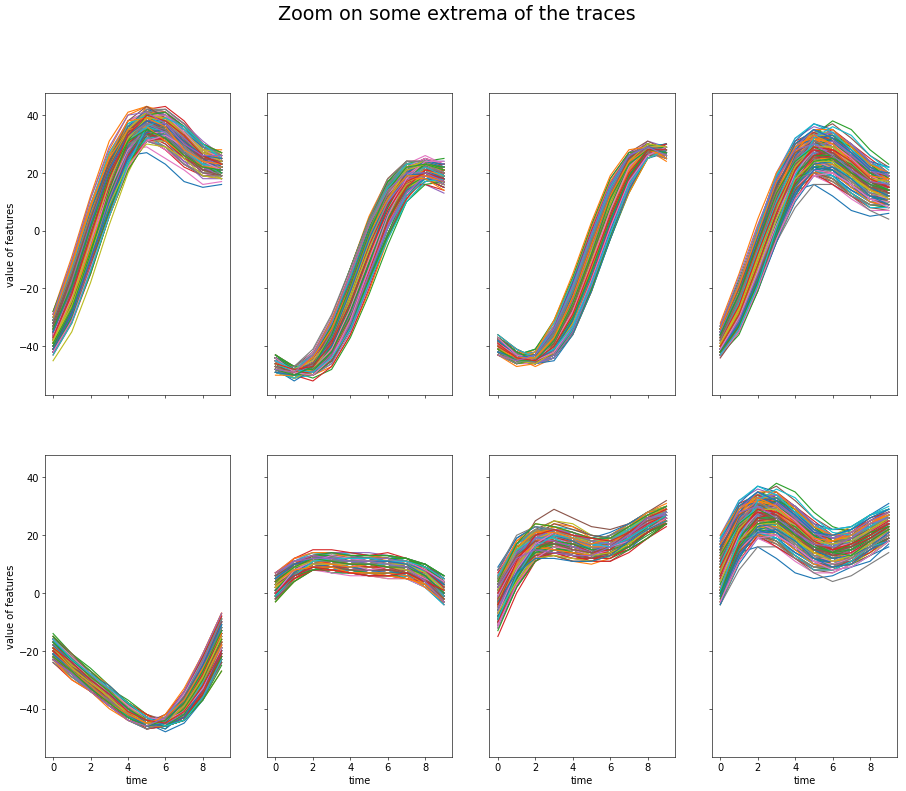

In [7]:
from sklearn.preprocessing import normalize

def plot_minima(minima,X_train,y_train,i,j,axs):
    for k in range(1,256):
            axs[i, j].plot(X_train[np.where(y_train == k)][0][minima-5:minima+5])

X_1 = normalize(X_train[np.where(y_train == 1)])
X_240 = normalize(X_train[np.where(y_train == 240)])

example = X_1[0]

local_max = np.r_[True, example[1:] > example[:-1]] & np.r_[example[:-1] > example[1:], True]
local_min = np.r_[True, example[1:] < example[:-1]] & np.r_[example[:-1] < example[1:], True]

maximum_idx = np.where(local_max == True)
minimas_idx = np.where(local_min == True)

n_sub = 0
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
plt.suptitle("Zoom on some extrema of the traces",fontsize=25)
fig.set_size_inches(20,16)
fig.dpi=55

axs.ravel()[n_sub].set_ylabel('value of features', fontsize=13) 
for maximum in [149,667,302,409]: #timestamps of maxima
    for i in range(1,256):
        axs.ravel()[n_sub].plot(X_train[np.where(y_train == i)][0][maximum-5:maximum+5])
        axs.ravel()[n_sub].tick_params(labelsize=13)
    n_sub += 1
        
axs.ravel()[n_sub].set_ylabel('value of features', fontsize=13) 
for minimum in [90,130,204,412]: #timestamps of minima
    for i in range(1,256):
        axs.ravel()[n_sub].plot(X_train[np.where(y_train == i)][0][minimum-5:minimum+5])
        axs.ravel()[n_sub].set_xlabel('time', fontsize=13)
        axs.ravel()[n_sub].tick_params(labelsize=13)
    n_sub += 1

plt.show()    

We noticed that we could locate some little differences in the extrema. Indeed, some features are distinguished from others by their value. It happens most often on the minimum cases. This could be a way to categorize the different labels but moreover to select the most useful features.

# 4. Baseline solution

# 5. Making a RAMP submission